# Análise Exploratória de Atrasos em Voos

Neste notebook, realizaremos uma análise exploratória do dataset de voos para responder às seguintes perguntas:
1. Qual(s) companhia(s) que mais registram atrasos? Analise qualitativa e quantitativamente.
2. A rota ou aeronave podem influenciar nos atrasos?
3. Existe algum padrão ou tendência nos atrasos? Se sim, o que pode ser feito para reduzi-los?

O dataset utilizado está disponível em: [nycflights.csv](https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv)

In [12]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
url = 'https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv'
df = pd.read_csv(url)

# Exibir as primeiras linhas para entender a estrutura dos dados
df.head()
print('Data loaded successfully.')

Data loaded successfully.


## Análise das Companhias com Mais Atrasos
Vamos analisar quais companhias aéreas têm os maiores atrasos médios e visualizar esses dados.

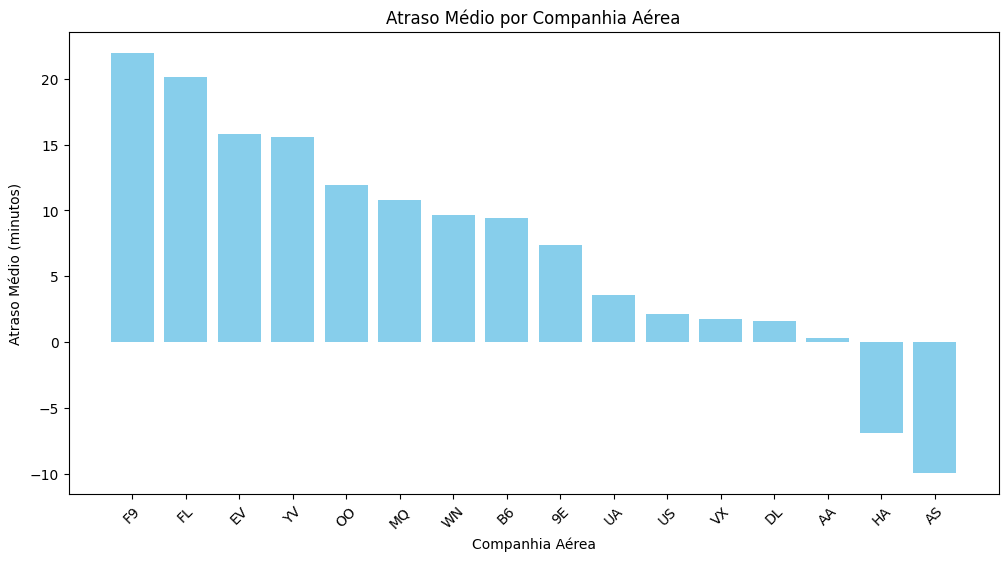

Carrier statistics calculated.


In [13]:
# Agrupar por companhia e calcular o atraso médio e o número de voos
carrier_stats = df.groupby('carrier').agg(
    total_flights=('flight', 'count'),
    avg_delay=('arr_delay', 'mean')
).reset_index()

# Ordenar por atraso médio
carrier_stats = carrier_stats.sort_values(by='avg_delay', ascending=False)

# Visualização: gráfico de barras do atraso médio por companhia
plt.figure(figsize=(12, 6))
plt.bar(carrier_stats['carrier'], carrier_stats['avg_delay'], color='skyblue')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Atraso Médio por Companhia Aérea')
plt.xticks(rotation=45)
plt.show()

print('Carrier statistics calculated.')

## Influência da Rota ou Aeronave nos Atrasos
Vamos analisar se a rota ou a aeronave influenciam nos atrasos e visualizar esses dados.

C:\Users\Diogo\AppData\Local\Temp\ipykernel_5968\378493318.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_delay', y='route', data=top_routes, palette='viridis')


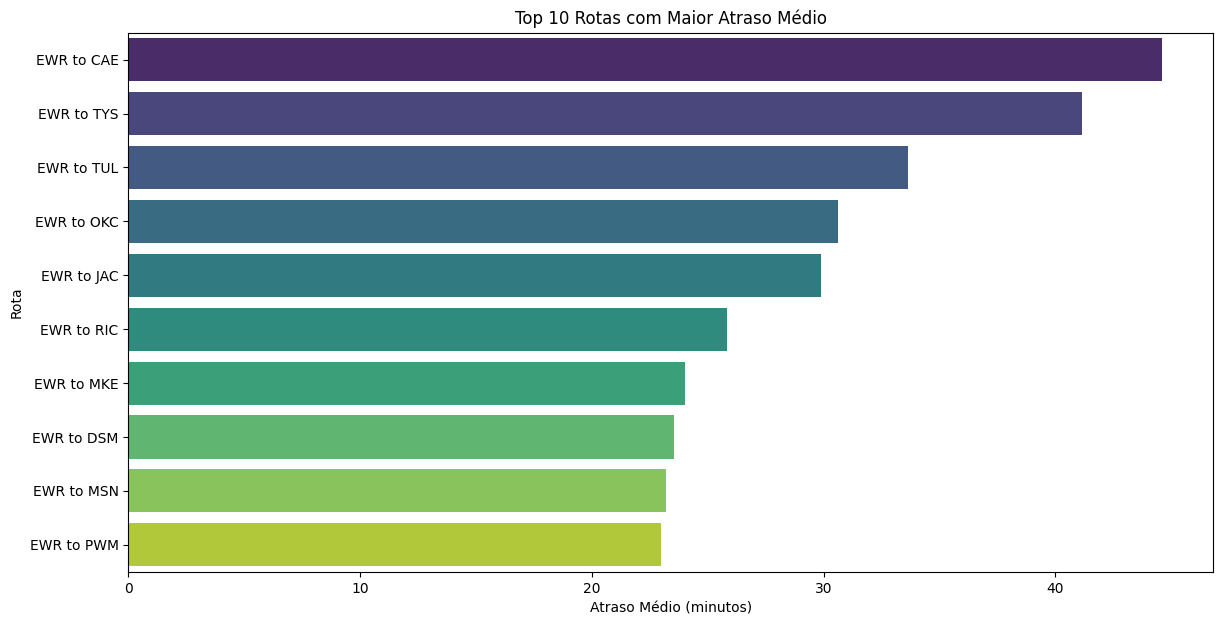

C:\Users\Diogo\AppData\Local\Temp\ipykernel_5968\378493318.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_delay', y='tailnum', data=top_aircraft, palette='cubehelix')


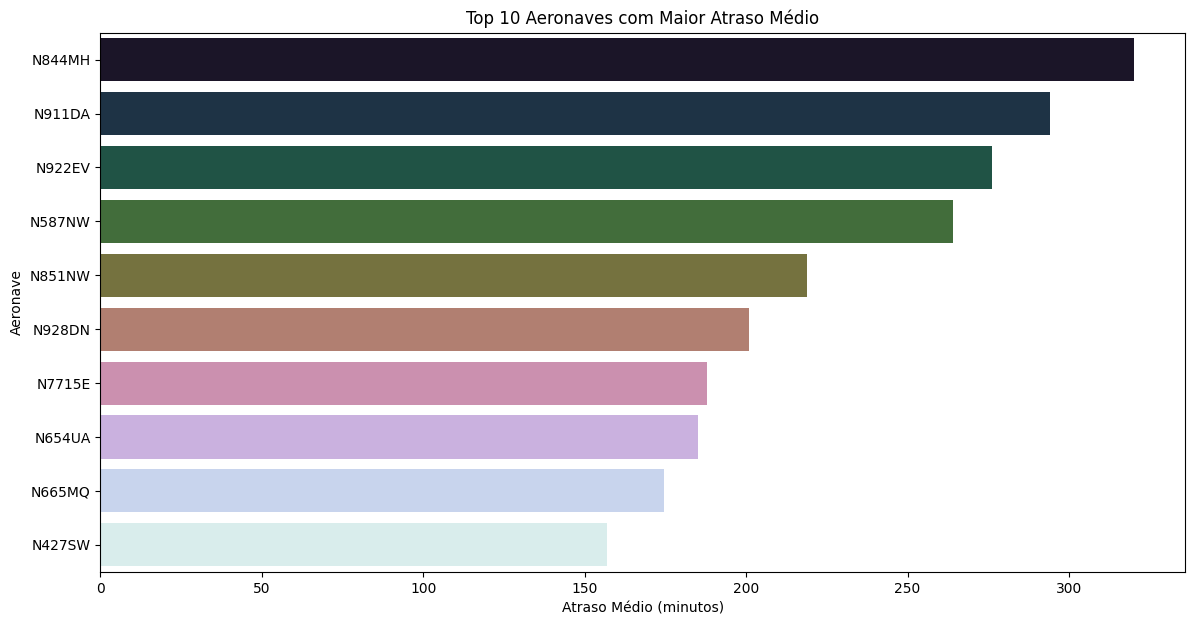

In [14]:
# Calcular o atraso médio por rota
route_delay = df.groupby(['origin', 'dest']).agg(avg_delay=('arr_delay', 'mean')).reset_index()

# Selecionar as top N rotas com maior atraso médio
top_n = 10
top_routes = route_delay.nlargest(top_n, 'avg_delay')

# Criar uma coluna para a rota combinada
top_routes['route'] = top_routes['origin'] + ' to ' + top_routes['dest']

# Visualização: gráfico de barras do atraso médio por top rotas
plt.figure(figsize=(14, 7))
sns.barplot(x='avg_delay', y='route', data=top_routes, palette='viridis')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Rota')
plt.title(f'Top {top_n} Rotas com Maior Atraso Médio')
plt.show()

# Calcular o atraso médio por aeronave
aircraft_delay = df.groupby('tailnum').agg(avg_delay=('arr_delay', 'mean')).reset_index()

# Selecionar as top N aeronaves com maior atraso médio
top_aircraft = aircraft_delay.nlargest(top_n, 'avg_delay')

# Visualização: gráfico de barras do atraso médio por top aeronaves
plt.figure(figsize=(14, 7))
sns.barplot(x='avg_delay', y='tailnum', data=top_aircraft, palette='cubehelix')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Aeronave')
plt.title(f'Top {top_n} Aeronaves com Maior Atraso Médio')
plt.show()

## Identificação de Padrões ou Tendências em Atrasos
Vamos identificar se há padrões ou tendências nos atrasos ao longo do tempo e visualizar esses dados.

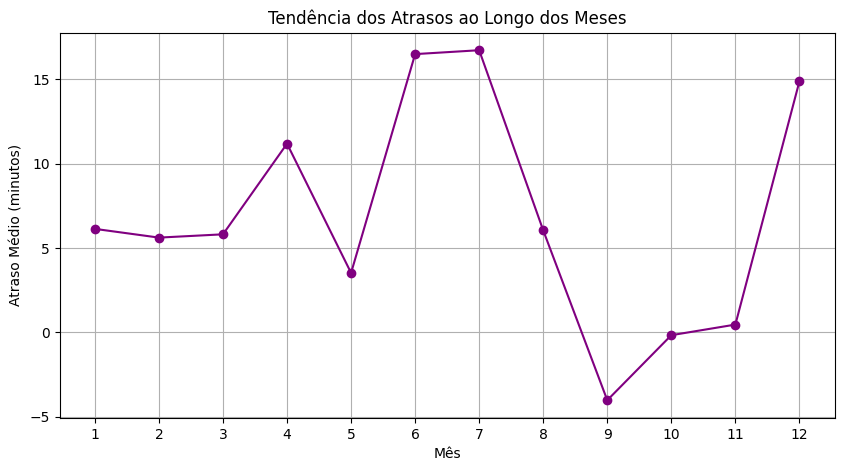

In [16]:
# Análise de atrasos ao longo do mês
monthly_delay = df.groupby('month').agg(avg_delay=('arr_delay', 'mean')).reset_index()

# Visualização: gráfico de linha do atraso médio ao longo dos meses
plt.figure(figsize=(10, 5))
plt.plot(monthly_delay['month'], monthly_delay['avg_delay'], marker='o', color='purple')
plt.xlabel('Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Tendência dos Atrasos ao Longo dos Meses')
plt.xticks(monthly_delay['month'])  # Adiciona os valores do mês no eixo x
plt.grid(True)
plt.show()

## Conclusão

Nesta análise exploratória, identificamos:

1. **Companhias Aéreas com Maior Atraso Médio**: As companhias aéreas com maior atraso médio foram identificadas, oferecendo insights sobre quais companhias podem precisar de revisão em suas operações para melhorar o desempenho.

2. **Influência das Rotas e Aeronaves nos Atrasos**: Analisamos a influência das rotas e aeronaves, destacando quais rotas e aeronaves apresentam maiores atrasos. Esses dados podem ajudar a focar melhorias específicas onde mais são necessárias.

3. **Padrões e Tendências nos Atrasos**: Observamos tendências nos atrasos ao longo dos meses. Identificar padrões sazonais pode ajudar na implementação de estratégias para minimizar atrasos durante períodos críticos.

Essas informações são úteis para melhorar a gestão de voos e reduzir os atrasos, oferecendo uma base para estratégias de otimização e planejamento.
